In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 16
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage', 
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 16011 files belonging to 10 classes.


In [4]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
len(dataset)

1001

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(16, 256, 256, 3)
[4 2 6 5 5 2 1 5 0 7 2 7 7 9 6 8]


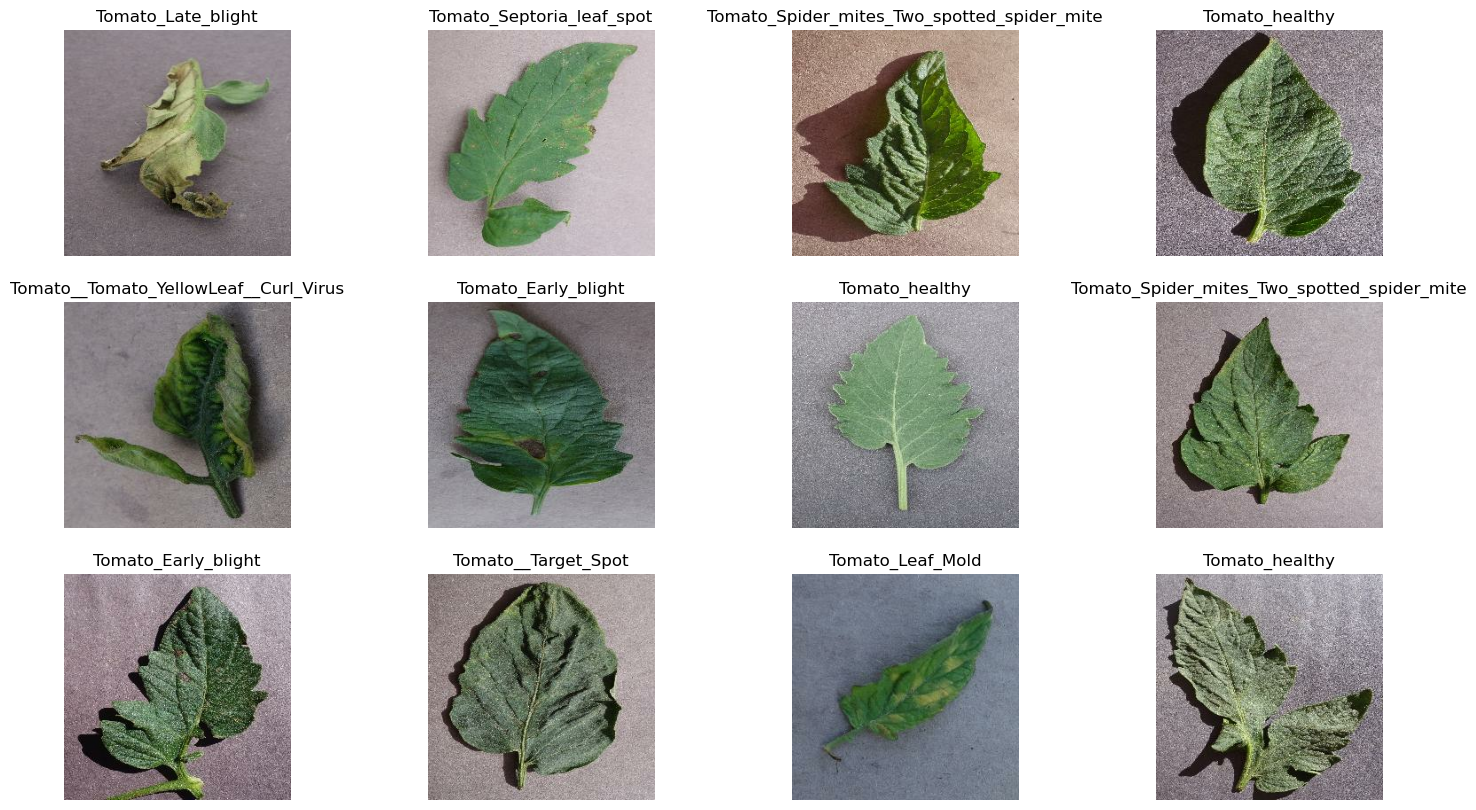

In [7]:
plt.figure(figsize=(18, 10))
for image_batch, label_batch in dataset.take(1):

    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]]) 
        plt.axis("off")

In [8]:
train_size = 0.8
len(dataset)*train_size

800.8000000000001

In [9]:
train_ds = dataset.take(400)
len(train_ds)

400

In [10]:
test_ds = dataset.skip(400)
len(test_ds)

601

In [11]:
val_size = 0.1
len(dataset) * val_size

100.10000000000001

In [12]:
val_ds = test_ds.take(50)
len(val_ds)

50

In [13]:
test_ds = test_ds.skip(50)
len(test_ds)

551

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
     assert (train_split + test_split + val_split) == 1

     ds_size = len(ds)

     if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
     train_size = int(train_split * ds_size)
     val_size = int(val_split * ds_size)

     train_ds = ds.take(train_size)
     val_ds = ds.skip(train_size).take(val_size)
     test_ds = ds.skip(train_size).skip(val_size)
    
     return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

800

In [17]:
len(val_ds)

100

In [18]:
len(test_ds)

101

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [21]:
 data_augmentation = tf.keras.Sequential([
     layers.RandomFlip("horizontal_and_vertical"),
     layers.RandomRotation(0.2)
 ])

In [22]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape = input_shape)

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (16, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (16, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (16, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (16, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (16, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (16, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (16, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (16, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (16, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (16, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (16, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (16, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (16, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (16, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (16, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (16, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (16, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [25]:
history = model.fit(
    train_ds, 
    epochs = EPOCHS, 
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 358s 431ms/step - accuracy: 0.3017 - loss: 1.9199 - val_accuracy: 0.4944 - val_loss: 1.5071
Epoch 2/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 315s 394ms/step - accuracy: 0.5977 - loss: 1.1330 - val_accuracy: 0.5644 - val_loss: 1.3908
Epoch 3/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 295s 368ms/step - accuracy: 0.7237 - loss: 0.8054 - val_accuracy: 0.6881 - val_loss: 0.9533
Epoch 4/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 297s 371ms/step - accuracy: 0.7751 - loss: 0.6349 - val_accuracy: 0.6900 - val_loss: 1.2240
Epoch 5/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 288s 360ms/step - accuracy: 0.8213 - loss: 0.5091 - val_accuracy: 0.7406 - val_loss: 0.8722
Epoch 6/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 294s 367ms/step - accuracy: 0.8415 - loss: 0.4467 - val_accuracy: 0.7644 - val_loss: 0.7098
Epoch 7/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 286s 357ms/step - accuracy: 0.8581 - loss: 0.4246 - val_accuracy: 0.8100 - val_loss: 0.6150
Epoch 8/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 281s 351ms/step - accuracy: 0.8808 -

In [26]:
scores = model.evaluate(test_ds)

101/101 ━━━━━━━━━━━━━━━━━━━━ 39s 135ms/step - accuracy: 0.9645 - loss: 0.1070


In [28]:
import os 
model_version = max([int(i) for i in os.listdir("./new_models") + [0]]) + 1
model.export(f"./new_models/{model_version}")
# model.save(f"./Models/3.keras")

INFO:tensorflow:Assets written to: ./new_models/4\assets


INFO:tensorflow:Assets written to: ./new_models/4\assets


Saved artifact at './new_models/4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1808114661328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1808114661520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1806085309840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1806085310608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1806085308880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1806085309264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1806085311760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1806085310992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1806085310800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1806085312720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1806085312528: TensorSpec(shape=(),

In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

First image to predict
First image's actual label:  Tomato__Tomato_mosaic_virus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
8


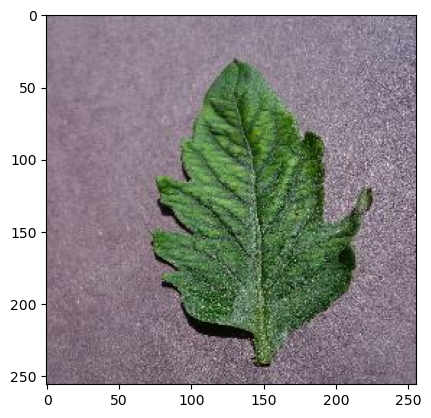

In [44]:
import numpy as np

for image_batch, labels_batch in test_ds.take(1):

    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("First image's actual label: ", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print(np.argmax(batch_prediction[0]))

In [34]:
acc = history.history['accuracy']  
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

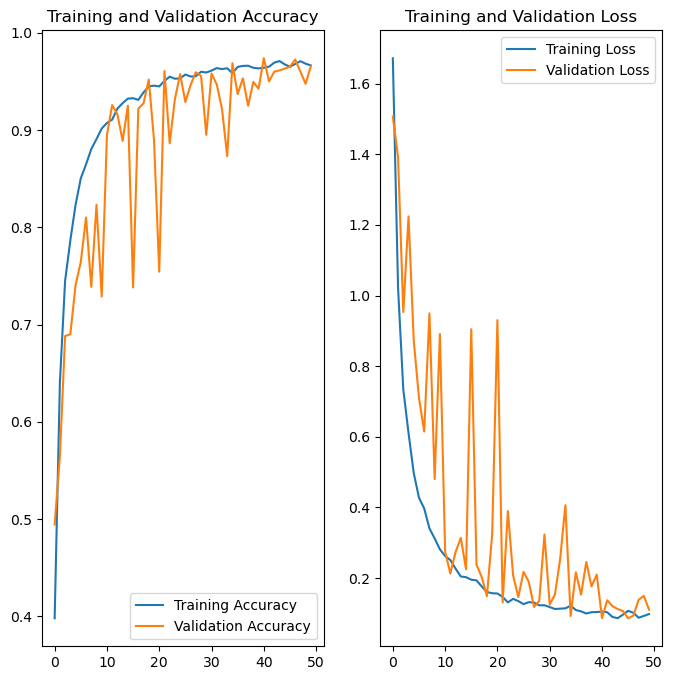

In [36]:
plt.figure(figsize = (8, 8))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

plt.show()

In [38]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])